### Resources

* http://barnesanalytics.com/analyzing-multivariate-time-series-using-arimax-in-python-with-statsmodels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('./data/salesdata2.csv')
print(df)

    Month    Marketing         Sales
0       1   107.284347    123.819229
1       2   214.523447    267.318463
2       3   327.159934    482.107206
3       4   437.384597    762.756909
4       5   518.389038    997.734857
..    ...          ...           ...
70     71  7589.918654   8529.339522
71     72  7771.809813  16866.334206
72     73  7840.068364  14860.740486
73     74  8022.535129  13465.360325
74     75  7809.123841   8801.807069

[75 rows x 3 columns]


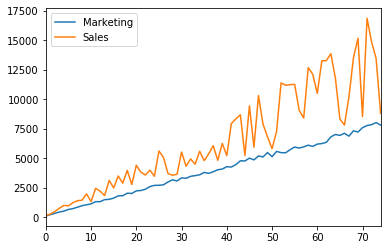

In [2]:
df[['Marketing','Sales']].plot()
plt.show()

With this you can clearly tell that both time-series are trending which is a fairly clear sign that both series have unit roots. We can check whether or not they have unit roots by using the augmented Dickey Fuller (ADF) test. Also, notice that Sales is more volatile than Marketing. Treating this will be a subject of a future post.

In [5]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(df['Marketing']))
print(sm.tsa.stattools.adfuller(df['Sales']))


(0.11973556900175938, 0.9673829869360326, 1, 73, {'1%': -3.5232835753964475, '5%': -2.902030597326081, '10%': -2.5883710883843123}, 788.4679673490132)
(-0.3515085974689588, 0.9178857330152571, 11, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 1117.9090016166876)


Clearly, we can not reject the null-hypothesis that these series have a unit root. So we should difference both series as a first step.

But let’s just run a naive regression to see what happens on the undifferenced time-series, and then again on the differenced time-series, here’s the code for the first regression.

In [6]:
df['const']=1
model1=sm.OLS(endog=df['Sales'],exog=df['Marketing','const'])
results1=model1.fit()
print(results1.summary())

KeyError: ('Marketing', 'const')